# Libraries


In [2]:
%pip install seaborn

  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

# from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
# from statsmodels.formula.api import ols      # For n-way ANOVA
# from statsmodels.stats.anova import anova_lm # For n-way ANOVA
# from   scipy.stats import chi2_contingency   # For Chi-Sq

# Read and Understand Data

In [6]:
#Reading the csv file AxisInsurance.csv
df = pd.read_csv('./Salary Data.csv')
insured=df.copy()

In [7]:
# inspect data, print top 5
insured.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
# bottom 5 rows:
insured.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [9]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [10]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [21]:
insured.shape.dtype

AttributeError: 'tuple' object has no attribute 'dtype'

In [ ]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


Rows     :  375
Columns  :  6


In [16]:
insured.isnull().sum().values

array([2, 2, 2, 2, 2, 2], dtype=int64)

In [12]:
insured.isnull().sum().values.sum()

12

In [26]:
insured[insured['Gender'] == 'Male']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
...,...,...,...,...,...,...
365,43.0,Male,Master's,Director of Marketing,18.0,170000.0
367,41.0,Male,Bachelor's,Senior Product Manager,14.0,150000.0
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0


In [22]:
insured = insured.dropna()

In [27]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))
# print ("\nFeatures : \n", list(insured.columns.to_list()))

# print ("\nMissing values :  ", insured.isnull().sum().values.sum())

# print ("\nUnique values :  \n", insured.nunique())



Values : 
 [[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0 90000.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0 65000.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0 150000.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0 40000.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0 90000.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0 150000.0]]

Features : 
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [24]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [28]:
#changing object dtype to category  to save memory
insured['Gender']=insured['Gender'].astype("category")
insured['Education Level']=insured['Education Level'].astype("category")
insured['Job Title']=insured['Job Title'].astype("category")


In [29]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 18.8 KB


In [30]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [36]:
(insured.select_dtypes(['category']).columns)

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [35]:
insured['Gender'].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [ ]:
# get counts of unique observations for each category variable
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

Male      194
Female    179
Name: Gender, dtype: int64
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [37]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

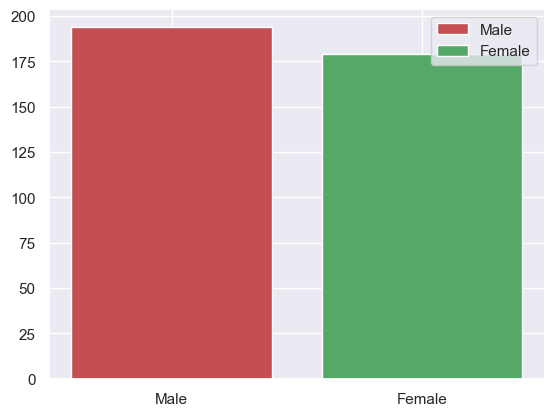

In [38]:
no_of_male = len(insured[insured['Gender'] == 'Male'])
no_of_female = len(insured[insured['Gender'] == 'Female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

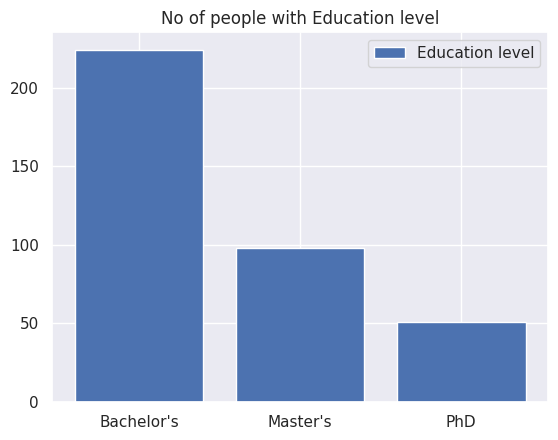

In [ ]:
#Alternet
#for gender
no_of_bach = len(insured[insured['Education Level'] == "Bachelor's"])
no_of_mast = len(insured[insured['Education Level'] == "Master's"])
no_of_phd = len(insured[insured['Education Level'] == 'PhD'])

plt.bar(["Bachelor's","Master's","PhD"],[no_of_bach,no_of_mast,no_of_phd], label='Education level')
plt.title('No of people with Education level')
plt.legend()
plt.show()

In [ ]:
# Analyzing categorical data

In [ ]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'Gender': [['Male', 'Female'], [194, 179]],
 'Education Level': [["Bachelor's", "Master's", 'PhD'], [224, 98, 51]],
 'Job Title': [['Director of Marketing',
   'Director of Operations',
   'Senior Business Analyst',
   'Senior Marketing Analyst',
   'Senior Marketing Manager',
   'Junior Business Analyst',
   'Junior Financial Analyst',
   'Senior Project Manager',
   'Junior Business Development Associate',
   'Senior Financial Analyst',
   'Senior Data Scientist',
   'Senior Product Manager',
   'Senior Software Engineer',
   'Junior Marketing Coordinator',
   'Senior Financial Manager',
   'Senior Product Designer',
   'Senior Operations Manager',
   'Junior Marketing Specialist',
   'Junior Operations Analyst',
   'Junior Project Manager',
   'Senior Project Coordinator',
   'Senior Data Engineer',
   'Senior Marketing Specialist',
   'Senior Operations Coordinator',
   'Senior Business Development Manager',
   'Junior Product Manager',
   'Junior Sales Representative',
   'Junior

In [ ]:
# Bar Graph

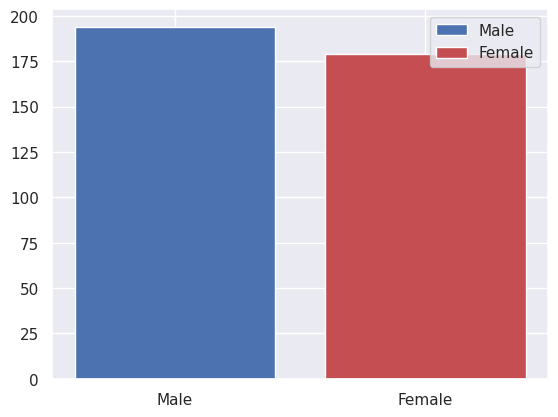

In [ ]:
plt.bar(data['Gender'][0],data['Gender'][1],label=['Male','Female'],
        color = ['b','r'])
plt.legend()
plt.show()

In [ ]:
# #Alternate
# print(data['region'])
# plt.bar(data['region'][0],data['region'][1],
#         label=['southeast', 'northwest', 'southwest', 'northeast'],
#         color = ['r','b','g','k'])
# plt.title('Region')
# plt.legend()
# plt.show()

[["Bachelor's", "Master's", 'PhD'], [224, 98, 51]]


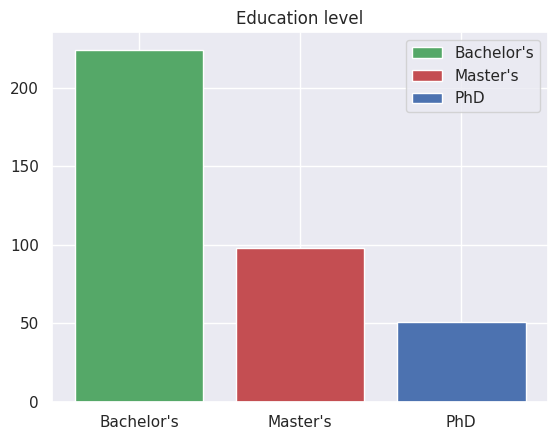

In [ ]:
#Alternate
print(data['Education Level'])
plt.bar(data['Education Level'][0],data['Education Level'][1],
        label=data['Education Level'][0],
        color = ['g','r','b'])
plt.title('Education level')
plt.legend()
plt.show()

## Bivariate & Multivariate Analysis

In [ ]:
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
insured.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


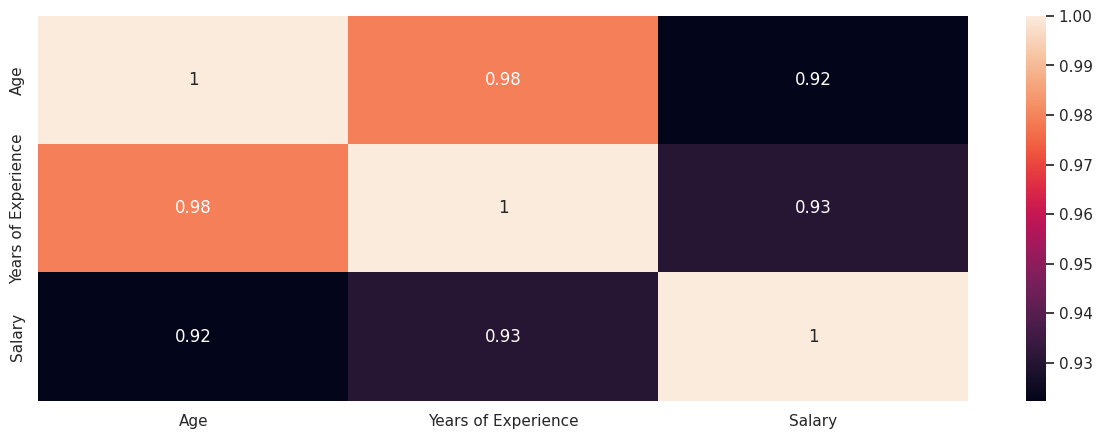

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(insured.corr(),annot=True)
plt.show()

**Observation**
 - There is  very little significant correlation between charges &age and charges and bmi.


<Figure size 500x500 with 0 Axes>

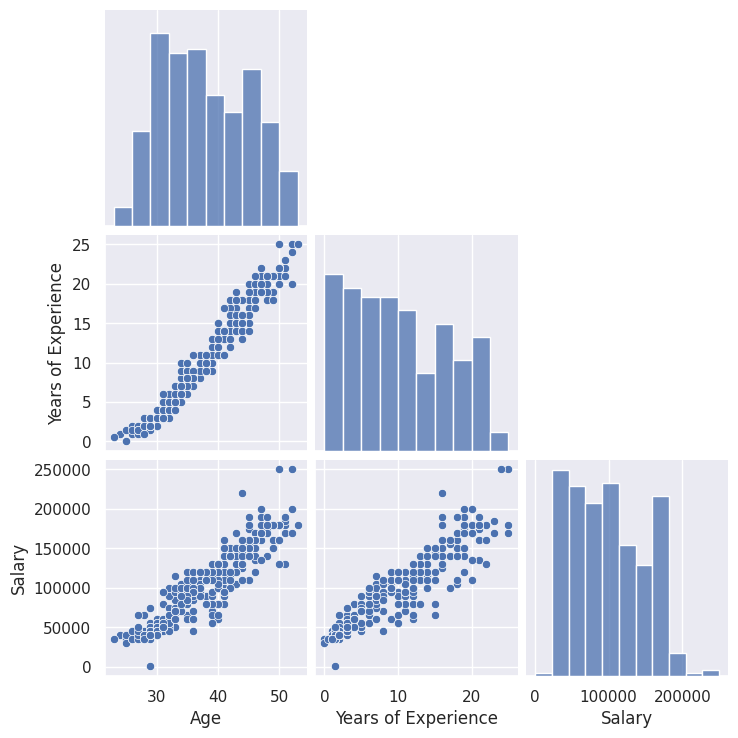

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured , corner=True)
plt.show()

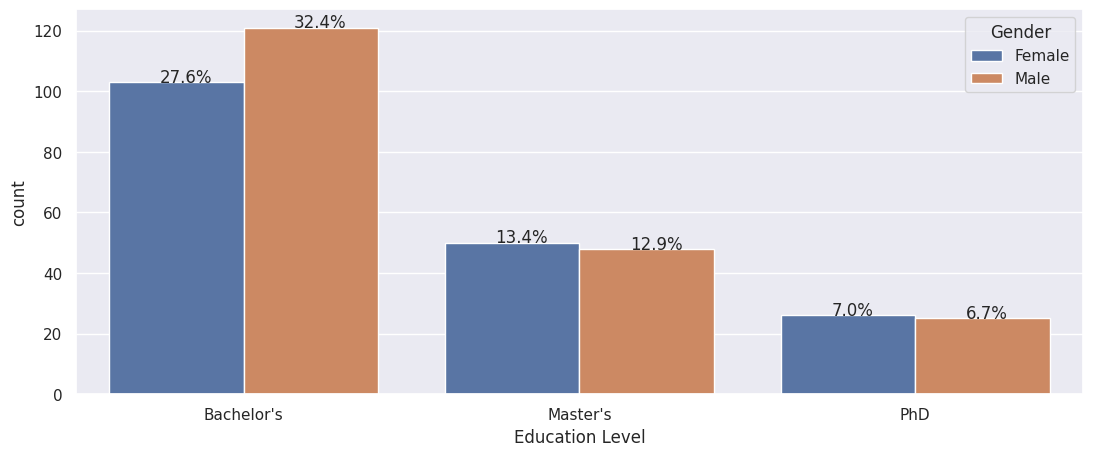

In [ ]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Education Level',hue='Gender',data=insured)
bar_perc(ax,insured['Education Level'])


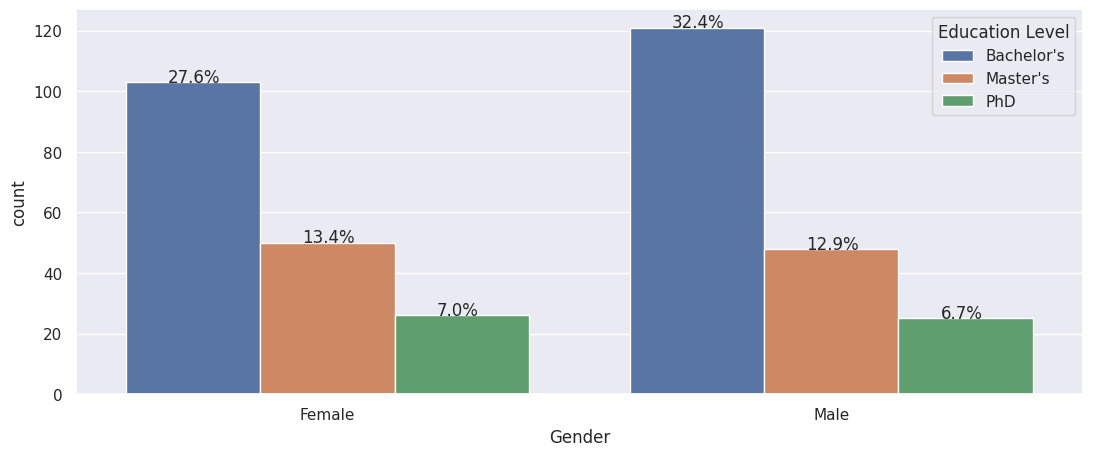

In [ ]:
#Sex vs smoker
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured)
bar_perc(ax,insured['Education Level'])


In [ ]:
#smoker vs charges
sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Charges")

In [ ]:
#region vs smoker
plt.figure(figsize=(10,5))
ax=sns.countplot(x='region',hue='smoker',data=insured)
bar_perc(ax,insured['smoker'])
ax.set(title="Smoker vs Region")

In [ ]:
#smoker vs region
plt.figure(figsize=(10,5))
ax=sns.countplot(x='smoker',hue='region',data=insured)
bar_perc(ax,insured['region'])
ax.set(title="Smoker vs Region")

**Observation**
- There are more male smokers than female.
- Southeast region has more smokers
- Smoker have more costlier claims than nonsmoker.

In [ ]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
bar_perc(ax,insured['sex'])
ax.set(title="Sex vs Region")

**Observations**
 - There are more smokers in southeast region compared to other regions.

In [ ]:
insured.head()

In [ ]:
# GROUP BY

In [ ]:
insured.groupby(insured.sex).expenses.mean()      #GROUP BY BY SEX

In [ ]:
insured.groupby(insured.region).expenses.mean()      #GROUP BY BY region

In [ ]:
insured.groupby(insured.smoker).expenses.mean()      #GROUP BY BY smoker

In [ ]:
insured.groupby(insured.children).expenses.mean()      #GROUP BY BY children

In [ ]:
ax = sns.barplot(x=insured.children,y=insured.expenses).set(title="Children vs Charges")
# bar_perc(ax,insured['sex'])
# ax.set(title="Sex vs Region")

In [ ]:
sns.barplot(x=insured.sex,y=insured.expenses).set(title='Sex Vs Charges')

In [ ]:
sns.barplot(x='region',y='expenses',data=insured).set(title='Region Vs Charges')

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["age"], y =insured["expenses"],hue=insured["sex"],ci=1).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["age"], y =insured["expenses"],hue=insured["sex"]).set(title= 'Cost incured by Age for Female and Males')
plt.legend()
plt.show()

In [ ]:
#Cross tab
df_smoker_char_sex1=pd.crosstab(index=insured.smoker, columns=insured.sex  , values=insured.expenses, aggfunc='mean')
df_smoker_char_sex1



In [ ]:
df_smoker_char_sex=pd.crosstab(index=insured.sex, columns=  insured.smoker, values=insured.expenses,aggfunc='sum')
df_smoker_char_sex

In [ ]:
# plot directly from dataframe

In [ ]:
df_smoker_char_sex1.plot(kind='bar',title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

In [ ]:
df_smoker_char_sex=pd.crosstab(index=insured.region, columns=  insured.sex, values=insured.expenses,aggfunc='mean')
df_smoker_char_sex

In [ ]:
df_smoker_char_sex.plot(kind='bar',title="Region Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()

**Observations**
 - Charges incurred for males are more than charges incured for females
 - With increasing age of policy holder charges incured are going high for both male and female.
 - There some spikes for female at an approximate ages of 23,28,43.
 - Most claims are from southeast regions.
 - Males who smoke have most claims and have higher bills
 - Number of claims made by female who dont smoke is more compared to female who smoke.




In [ ]:
# converting quantitative data to qualitative
insured

In [ ]:
#creating groups of bmi
category = pd.cut(insured.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
insured.insert(5,'BMIGroup',category)


In [ ]:
insured.head()

In [ ]:
insured.groupby(insured.BMIGroup).expenses.mean()

In [ ]:
category1=pd.cut(insured.age,bins=[16,28,38,48,58,68],labels=['16-28','28-38','38-48','48-58','58-68'])
insured.insert(6,'AgeBin',category1)

In [ ]:
insured.head()

In [ ]:
age_bin_cat = insured.groupby(insured.AgeBin).expenses.mean()
age_bin_cat

In [ ]:
age_bin_cat.plot(kind='bar',title="Agebins vs Avg Expenses")


In [ ]:
#multi variate data analysis
insured.groupby(['region','sex','smoker']).expenses.mean()

In [ ]:
insured.groupby(['region','sex','smoker']).expenses.mean().unstack()

In [ ]:
sns.barplot(x=insured.AgeBin,y=insured.expenses).set(title='Age Vs Charges')

In [ ]:
sns.barplot(x=insured.BMIGroup,y=insured.expenses)

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["BMIGroup"],y=insured["age"],hue=insured['sex'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [ ]:
sns.barplot(x='BMIGroup',y='expenses',hue='sex',data=insured).set(title="Fig 2:BMI group and Charges " )

**Observations**
- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [ ]:
pd.crosstab(insured['sex'],insured['children'])


In [ ]:
sns.relplot(x=insured.BMIGroup, y=insured.expenses, hue=insured.smoker, size= insured.AgeBin,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

In [ ]:
insured

In [ ]:
sns.relplot(x=insured.AgeBin, y=insured.expenses, hue=insured.sex, size= insured.BMIGroup,
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Charges by Age,BMI,Smoker');

**Observation**
- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased
-Smoker have higher medical claims

# Conclusion based on EDA
- As expected , as the age of the beneficiary  increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent  have billed higher compared to others people who have 5.This is unusual and may be because of  uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi  >30 are  on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.


# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

In [ ]:
smoker.count()

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

In [ ]:
nonsmoker.count()

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [ ]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


In [ ]:
#smoker vs charges
sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
charges_no

In [ ]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


In [ ]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

In [ ]:
df_male.bmi.mean()

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
